<h1> Visualisasi Data Time Series dan Analisa Statistik Covid-19 </h1>

Bagian 1. Data covid-19 se-Indonesia
<ul>
    <li>Analisa statistik deskriptif sederhana</li>
    <li>Visualisasi time series</li>
</ul>

Bagian 2. Data covid-19 per-Provinsi
<ul>
    <li>Visualisasi barplot per-provinsi</li>
</ul>

Sumber data: [Satgas Penanganan Covid-19 Republik Indonesia](https://bnpb-inacovid19.hub.arcgis.com/search?collection=Dataset "InaCOVID-19") (* Update 20 Oktober 2020)

### Bagian 1. Visualisasi Data dan Analisa Statistik Covid-19 Di Indonesia

In [1]:
# Load library yang digunakan
# Lib untuk manipulasi data
import numpy as np
import pandas as pd

# lib untuk model statistik
import scipy.stats as sc

# lib untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load dataset
# ket. data sudah di pra-proses (seleksi fitur dan reduksi dimensi)
dataset = pd.read_excel("D:/Bahan Ajar Big Data/dataset/dataset_covid.xlsx", sheet_name="data covid indonesia")

# melihat tipe data yang terbaca oleh python
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tanggal               232 non-null    datetime64[ns]
 1   positif_kumulatif     232 non-null    int64         
 2   sembuh_kumulatif      232 non-null    int64         
 3   meninggal_kumulatif   232 non-null    int64         
 4   positif_harian        232 non-null    int64         
 5   sembuh_harian         232 non-null    int64         
 6   meninggal_harian      232 non-null    int64         
 7   perawatan_kumulatif   232 non-null    int64         
 8   perawatan_harian      232 non-null    int64         
 9   persentase_sembuh     232 non-null    float64       
 10  persentase_meninggal  232 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 20.1 KB


In [3]:
# Diketahui data tanggal masih berupa object..? lalu skrng kita convert ke tipe date
# Tujuannya agar dapat dilakukan plot time series positif, sembuh dan meninggal
dataset["tanggal"] = pd.to_datetime(dataset["tanggal"], format="%Y/%m/%d")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tanggal               232 non-null    datetime64[ns]
 1   positif_kumulatif     232 non-null    int64         
 2   sembuh_kumulatif      232 non-null    int64         
 3   meninggal_kumulatif   232 non-null    int64         
 4   positif_harian        232 non-null    int64         
 5   sembuh_harian         232 non-null    int64         
 6   meninggal_harian      232 non-null    int64         
 7   perawatan_kumulatif   232 non-null    int64         
 8   perawatan_harian      232 non-null    int64         
 9   persentase_sembuh     232 non-null    float64       
 10  persentase_meninggal  232 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 20.1 KB


In [4]:
# Menampilkan dataset yang digunakan
dataset

,tanggal,positif_kumulatif,sembuh_kumulatif,meninggal_kumulatif,positif_harian,sembuh_harian,meninggal_harian,perawatan_kumulatif,perawatan_harian,persentase_sembuh,persentase_meninggal
0,2020-03-02,2,0,0,2,0,0,2,2,0.000000,0.000000
1,2020-03-03,2,0,0,0,0,0,2,0,0.000000,0.000000
2,2020-03-04,2,0,0,0,0,0,2,0,0.000000,0.000000
3,2020-03-05,2,0,0,0,0,0,2,0,0.000000,0.000000
4,2020-03-06,4,0,0,2,0,0,4,2,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
227,2020-10-15,349160,273661,12268,4411,5810,112,63231,-1511,78.376962,3.513575
228,2020-10-16,353461,277544,12347,4301,3883,79,63570,339,78.521817,3.493172
229,2020-10-17,357762,281592,12431,4301,4048,84,63739,169,78.709310,3.474656
230,2020-10-18,361867,285324,12511,4105,3732,80,64032,293,78.847753,3.457348


#### Melakukan analisa statistik deskriptif sederhana.
1. Menghitung jumlah positif, sembuh dan meninggal di Indonesia
2. Menghitung persentase sembuh dan meninggal 
3. Menghitung korelasi dan signifikansi positif dengan sembuh dan positif dengan meninggal jika dilihat dari pergerakan data secara time series \
(update 20 Oktober 2020)

In [5]:
# Menghitung jumlah positif, sembuh dan meninggal di Indonesia
# Cara manualnya adalah menjumlahkan data harian positif, sembuh dan meninggal
# Cara otomatisasinya adalah meninggunakan fungsi sum()

positif_kumulatif = dataset["positif_harian"].sum()
sembuh_kumulatif = dataset["sembuh_harian"].sum()
meninggal_kumulatif = dataset["meninggal_harian"].sum()

print("Jumlah Positif \t\t: " + " {:,} ".format(positif_kumulatif) + "orang")
print("Jumlah Sembuh \t\t: " + " {:,} ".format(sembuh_kumulatif) + "orang")
print("Jumlah Meninggal \t: " + " {:,} ".format(meninggal_kumulatif) + "orang")

Jumlah Positif 		:  365,240 orang
Jumlah Sembuh 		:  289,243 orang
Jumlah Meninggal 	:  12,617 orang


In [6]:
# Menghitung persentase sembuh dan meninggal
# kumulatif sembuh / kumulatif positif * 100%
# kumulatif meninggal / kumulatif positif * 100%

persentase_sembuh = (dataset["sembuh_harian"].sum() / dataset["positif_harian"].sum())*100
persentase_meninggal = (dataset["meninggal_harian"].sum() / dataset["positif_harian"].sum())*100

print("Persentase sembuh \t: " +"{:.2f} ".format(persentase_sembuh)+ "%")
print("Persentase meninggal \t: " +"{:.2f} ".format(persentase_meninggal)+ "%")

Persentase sembuh 	: 79.19 %
Persentase meninggal 	: 3.45 %


In [7]:
# Menghitung korelasi dan signifikansi positif dengan sembuh dan positif dengan meninggal jika dilihat dari pergerakan data secara time series.
# Terdapat beberapa metode korelasi seperti Uji-Kontingensi, Uji-Phi, Uji-Spearman Rank, Uji-Kendall, Uji-Pearson.
# 1. Uji-Kontingensi adalah korelasi dengna skala nominal dan bersifat non-parametrik.
# 2. Uji-Phi adalah korelasi dengna skala nominal dan bersifat non-parametrik. Korelasi ini umumnya untuk data-data dikotomik.
# 3. Uji-Spearman Rank adalah korelasi dengan skala ordinal dan bersifat non-parametrik.
# 4. Uji-Kendall adalah korelasi dengan skala ordinal dan bersifat non-parametrik.
# 5. Uji-Pearson adalah korelasi dengan skala interval dan bersifat parametrik. Dimana datanya akan continue
# Karena data covid berskala interval dan berisifat parametrik sehingga metode yang cocok adalah uji-pearson.

# Memanggil fungsi pearsonr(x, y). Dimana r adalah nilai korelasi dan p adalah nilai signifikansi
r1, p1 = sc.pearsonr(dataset["positif_harian"], dataset["sembuh_harian"])
r2, p2 = sc.pearsonr(dataset["positif_harian"], dataset["meninggal_harian"])

print("korelasi positif harian dengan sembuh harian adalah" +" {:.4f} ".format(r1)+ "dengan signifikansi" +" {:.4f} ".format(p1))
print("korelasi positif harian dengan meninggal harian adalah" +" {:.4f} ".format(r2)+ "dengan signifikansi" +" {:.4f} ".format(p2))

# Diketahui bahwa uji korelasi bersifat kuat dan berpengaruh secara nyata.

korelasi positif harian dengan sembuh harian adalah 0.9495 dengan signifikansi 0.0000 
korelasi positif harian dengan meninggal harian adalah 0.8895 dengan signifikansi 0.0000 


#### Melakukan Visualisasi Data Covid-19 Di Indonesia
1. Visual Time Series (line chart) untuk data kumulatif Indonesia
2. Visual Time Series (line chart) untuk data harian Indonesia

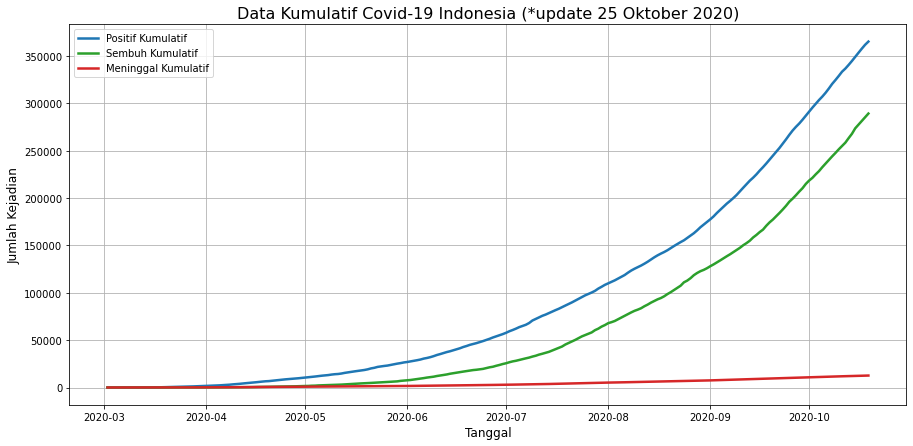

In [8]:
# Membuat plot time series data kumulatif Covid-19

# membuat frame
fig, ax = plt.subplots(figsize=(15, 7))

# membuat time series plot
ax.plot(dataset.tanggal, dataset.positif_kumulatif, color='tab:blue', label='Positif Kumulatif', linewidth=2.5)
ax.plot(dataset.tanggal, dataset.sembuh_kumulatif, color='tab:green', label='Sembuh Kumulatif', linewidth=2.5)
ax.plot(dataset.tanggal, dataset.meninggal_kumulatif, color='tab:red', label='Meninggal Kumulatif', linewidth=2.5)

# membuat label-label
ax.set_title('Data Kumulatif Covid-19 Indonesia (*update 25 Oktober 2020)', fontsize=16)
ax.set_xlabel('Tanggal', fontsize=12)
ax.set_ylabel('Jumlah Kejadian', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True)

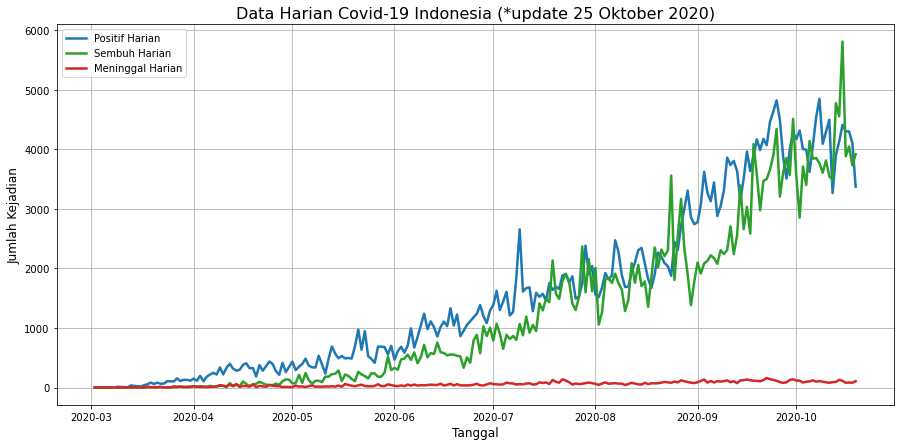

In [9]:
# Membuat plot time series data harian Covid-19

# membuat frame
fig, ax = plt.subplots(figsize=(15, 7))

# membuat time series plot
ax.plot(dataset.tanggal, dataset.positif_harian, color='tab:blue', label='Positif Harian', linewidth=2.5)
ax.plot(dataset.tanggal, dataset.sembuh_harian, color='tab:green', label='Sembuh Harian', linewidth=2.5)
ax.plot(dataset.tanggal, dataset.meninggal_harian, color='tab:red', label='Meninggal Harian', linewidth=2.5)

# membuat label-label
ax.set_title('Data Harian Covid-19 Indonesia (*update 25 Oktober 2020)', fontsize=16)
ax.set_xlabel('Tanggal', fontsize=12)
ax.set_ylabel('Jumlah Kejadian', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True)

* Berdasarkan plot tersebut diketahui bahwa Covid-19 sudah hampir selesai. Karena perkembangan jumlah sembuh sudah mendekati jumlah positif.
* Sedangkan kasus meninggal tidak mengalami peningkatan yang tajam

## Bagian 2. Visualisasi Data dan Analisa Statistik Covid-19 Per-Provinsi

In [10]:
# Load library yang digunakan
# Lib untuk manipulasi data
import numpy as np
import pandas as pd
# lib untuk model statistik
import scipy.stats as sc
# lib untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Load dataset
# ket. data sudah di pra-proses (seleksi fitur dan reduksi dimensi)
df = pd.read_excel("D:/Bahan Ajar Big Data/dataset/dataset_covid.xlsx", sheet_name="data covid provinsi")

# melihat tipe data yang terbaca oleh python
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   provinsi          34 non-null     object
 1   jumlah_positif    34 non-null     int64 
 2   jumlah_sembuh     34 non-null     int64 
 3   jumlah_meninggal  34 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [12]:
# Menampilkan dataset yang digunakan
df

,provinsi,jumlah_positif,jumlah_sembuh,jumlah_meninggal
0,Aceh,6844,5037,238
1,Sumatera Utara,12212,9894,509
2,Sumatera Barat,11652,6410,210
3,Riau,12319,8396,279
4,Jambi,1049,379,21
5,Sumatera Selatan,7328,5522,398
6,Bengkulu,917,727,45
7,Kepulauan Bangka Belitung,191,173,2
8,Lampung,1420,912,54
9,Kepulauan Riau,3012,2361,70


#### Melakukan Visualisasi Data Covid-19 Di Provinsi
1. Barplot positif, sembuh, meninggal berdasarkan provinsi
1. Grouped Barplot positif, sembuh, meninggal berdasarkan provinsi

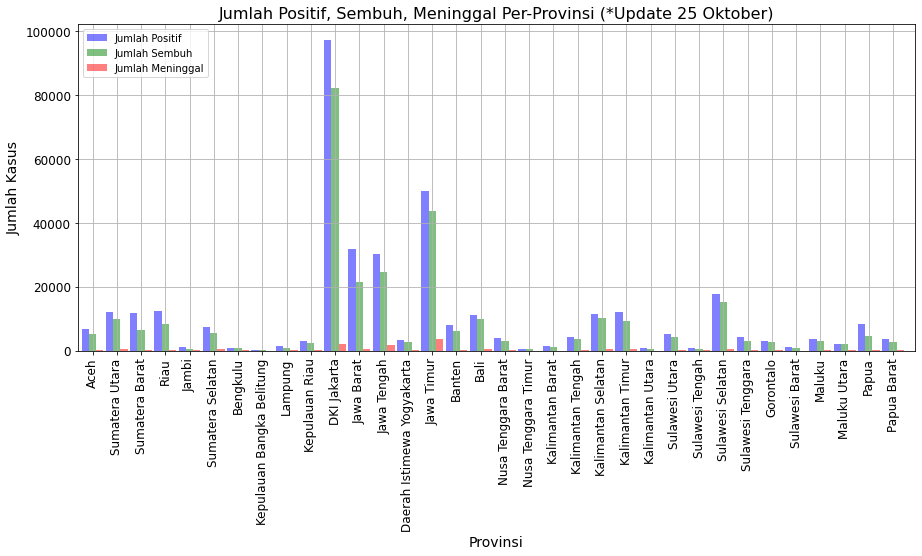

In [13]:
# Membuat group barplot jumlah positif, jumlah sembuh, jumlah meninggal Covid-19 berdasarkan provinsi
# https://chrisalbon.com/python/data_visualization/matplotlib_grouped_bar_plot/
# https://www.kaggle.com/python10pm/plotting-with-python-learn-80-plots-step-by-step

# Setting the positions and width for the bars
pos = list(range(len(df['provinsi']))) 
width = 0.3

# membuat frame
fig, ax = plt.subplots(figsize=(15, 6))

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar(pos, 
        #using df['post_score'] data,
        df['jumlah_positif'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='blue', 
        # with label the third value in first_name
        label=df['provinsi'][0])

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['jumlah_sembuh'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='green', 
        # with label the second value in first_name
        label=df['provinsi'][1])

# Create a bar with pre_score data,
# in position pos,
plt.bar([p + width*2 for p in pos], 
        #using df['pre_score'] data,
        df['jumlah_meninggal'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='red', 
        # with label the first value in first_name
        label=df['provinsi'][2])

# Set the y axis label
ax.set_ylabel('Jumlah Kasus', fontsize=14)
ax.set_xlabel('Provinsi', fontsize=14)


# Set the chart's title
ax.set_title('Jumlah Positif, Sembuh, Meninggal Per-Provinsi (*Update 25 Oktober)', fontsize=16)

# Set the position of the x ticks
ax.set_xticks([p + 1 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['provinsi'])

ax.tick_params(axis = 'x', labelsize = 12, labelrotation = 90)
ax.tick_params(axis = 'y', labelsize = 12)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)

# Adding the legend and showing the plot
plt.xticks(rotation=90)
plt.legend(['Jumlah Positif', 'Jumlah Sembuh', 'Jumlah Meninggal'], loc='upper left')
plt.grid()
plt.show()